<a href="https://colab.research.google.com/github/Codingtheedge/testtest/blob/main/Numerical_Optimization_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg as la

**1. Function  Plot**

with function *meshgrid*, *contour* and *contourf*

$
f(x) = 10 (x_2 - x_1^2)^2 + (1-x_1)^2
$

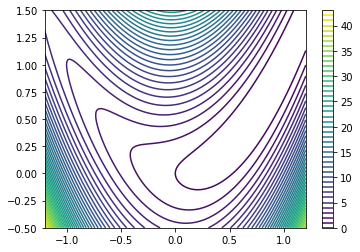

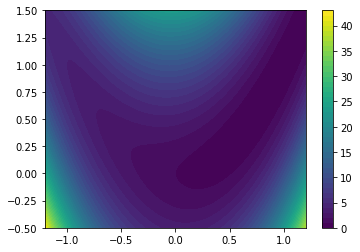

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

#f(x) = 10 (x2 - x1**2)**2 + (1-x1)**2
def rosen(x):
  f = 10 * (x[1] - x[0]**2)**2 + (1-x[0])**2
  return f

nx, ny = (240, 200)
xv = np.linspace(-1.2, 1.2, nx)
xh = np.linspace(-0.5,1.5, ny)
x0, x1 = np.meshgrid(xv, xh, sparse= True)

F = np.zeros((x1.shape[0],x0.shape[1])) # shape (200,240)

for i in range(F.shape[0]):
  for j in range(F.shape[1]):
    x = [x0[0,j], x1[i,0]]
    F[i, j] = rosen(x)

plt.figure('Contours')
plt.contour(x0[0,:], x1[:,0], F, 50)
plt.axis('scaled')
plt.colorbar()
plt.show()

plt.figure('Contours')
plt.contourf(x0[0,:], x1[:,0], F, 50)
plt.axis('scaled')
plt.colorbar()
plt.show()

**2. Gradient Computation**

with fucntion *symbols* and *diff*

$
∇f=\begin{bmatrix}
    -40x_1(x_2-x_1^2)+2x_1-2 \\ 
    20*(x_2-x_1^2) 
   \end{bmatrix} 
$

In [ ]:
from sympy import symbols, diff
x_1, x_2 = symbols('x_1 x_2', real= True)
g0 = diff((10 * (x_2 - x_1**2)**2 + (1-x_1)**2),x_1)
g1 = diff((10 * (x_2 - x_1**2)**2 + (1-x_1)**2),x_2)

def rosen_grad(x):
  g = np.zeros(2)  
  g[0] = g0.subs({x_1:x[0], x_2:x[1]})
  g[1] = g1.subs({x_1:x[0], x_2:x[1]})
  return g

**3. Backtracking Line Search**

In [ ]:
def backtrack_linesearch(f, gk, pk, xk, alpha = 0.1, beta = 0.8): # Algorithm parameters alpha and beta
  t = 1
  while(f(xk + t*pk) > f(xk) + alpha * t * gk @ pk):
    t *= beta # reduce t incrementally
  return t

def steepest_descent_bt(f, grad, x0):
  tol = 1e-5 # converge to a gradient norm of 1e-5 
  x = x0
  history = np.array( [x0] )
  while ( la.norm(grad(x)) > tol ):
    p = -grad(x)
    t = backtrack_linesearch(f, grad(x), p, x)
    x += t * p
    history = np.vstack( (history, x) )# The returned array formed by stacking the given arrays, will be at least 2-D.
  return x, history

# plot convergence behaviour
x_startpoint = np.array([-1.2, 1.0]) # start point

xstar, hist = steepest_descent_bt(rosen, rosen_grad, x_startpoint)
nsteps = hist.shape[0]

print('Optimal solution:',xstar)
print('The minima is ',rosen(xstar))
print('Iteration count:', nsteps)

Optimal solution: [1.00000578 1.00001197]
The minima is  3.514046547976252e-11
Iteration count: 1311


**4. Convergence Behavior**

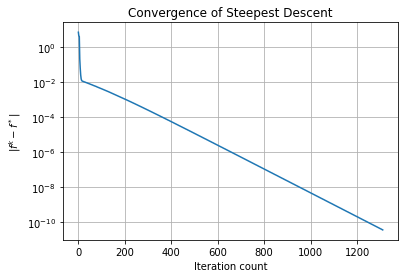

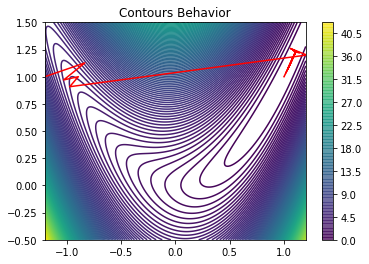

In [ ]:
fhist = np.zeros(nsteps)
for i in range(nsteps):
  fhist[i] = rosen(hist[i,:])

plt.figure('Convergence behaviour')
plt.semilogy(np.arange(0, nsteps), np.absolute(fhist))
plt.grid(True, which ="both") 
plt.title('Convergence of Steepest Descent') 
#plt.text(0,10e-10,'Y axis in Semilogy')    #text annotation
plt.xlabel('Iteration count')
plt.ylabel(r'$|f^k - f^*|$') 
plt.show()

plt.figure('Contours Behavior')
plt.title('Contours Behavior')
plt.contour(x0[0,:], x1[:,0], F, 150)
plt.axis('scaled')
plt.plot(hist[:,0],hist[:,1],'r-')
plt.colorbar()
plt.show()

On a semilog plot, $|f^k-f^*|$ vs *k* looks like a straight piecewise line segment.From the figure *Contours Behaviour*, the rate of convergence is very fast, but the search path is different with the samples given by slides.